# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar un  diccionario con en el siguiente orden:

* cantidad de columnas
* Nombre de las columnas
* número de registros no NaN de cada columna
* cantidad total de memoria usada para cargar el dataset en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None


# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandas pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)




# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTWsahNju_LTtJBjuaaILBx_3QutbzK-HCjGoLtrtcIBEu4rOQgdiz17AD8SDa13g/pub?output=csv"
df = pd.read_csv(path)

In [3]:
#problema 1
def diccionario(df):

  dicc = {}
  df = df.set_index("Date")
  df = df.drop("Unnamed: 1", axis = 1) 
  dicc["Columnas"] = len(df.columns)
  dicc["Nombres_Columnas"] = list(df.columns)

#Encontrar una forma mas sencilla

  suma = []
  for col in df.columns:
    tf = pd.isnull(df[col])
    tf1 = ~tf
    suma.append(tf1.sum()) # lista con los valores en orden de izquierda a derecha de los valores !=NaN

  
  NaNs = {"Berri1_NaNs" : suma[0], "Maisonneuve_1NaNs" : suma[1], "Maisonneuve_2NaNs" : suma[2], "Brebuf_NaNs" : suma[3]}
  dicc["Numeros_!=_NaN"] = NaNs

  memory_to = list(df.memory_usage())
  Memory = {"index" : memory_to[0],"Berri1" : memory_to[1],"Maisonneuve_1" : memory_to[2],"Maisonneuve_2" : memory_to[3],"Brebeuf" : memory_to[4]}
  dicc["Memory"] = Memory

  Date_Median = list(df.mean(axis = 0))
  Medias = {"Berri1" : Date_Median[0],"Maisonneuve_1" : Date_Median[1],"Maisonneuve_2" : Date_Median[2],"Brebeuf" : Date_Median[3]}
  dicc["Medias"] = Medias

  Desviacion_es = list(df.std(axis = 0))
  Desviacion = {"Berri1" : Desviacion_es[0],"Maisonneuve_1" : Desviacion_es[1],"Maisonneuve_2" : Desviacion_es[2],"Brebeuf" : Desviacion_es[3]}
  dicc["Desviacion_estandar"] = Desviacion

  maximo_to = list(df.max(axis = 0))
  Maximo = {"Berri1" : maximo_to[0],"Maisonneuve_1" : maximo_to[1],"Maisonneuve_2" : maximo_to[2],"Brebeuf" : maximo_to[3]}
  dicc["Maximo"] = Maximo

  df1 = df.copy() # Hago una copia del data frame pues si quiero cambiar los NaN por None no es posible hacer lo en el df principal porque saldria errores
  df1["Brebeuf"] = df1["Brebeuf"].fillna("None") 

  return dicc

print(diccionario(df))

{'Columnas': 4, 'Nombres_Columnas': ['Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf'], 'Numeros_!=_NaN': {'Berri1_NaNs': 365, 'Maisonneuve_1NaNs': 365, 'Maisonneuve_2NaNs': 365, 'Brebuf_NaNs': 178}, 'Memory': {'index': 2920, 'Berri1': 2920, 'Maisonneuve_1': 2920, 'Maisonneuve_2': 2920, 'Brebeuf': 2920}, 'Medias': {'Berri1': 2032.2, 'Maisonneuve_1': 1060.2520547945205, 'Maisonneuve_2': 2093.1698630136984, 'Brebeuf': 2576.3595505617977}, 'Desviacion_estandar': {'Berri1': 1878.8797986572208, 'Maisonneuve_1': 1079.5330858971347, 'Maisonneuve_2': 1854.3685230878293, 'Brebeuf': 2484.0047433344985}, 'Maximo': {'Berri1': 6626.0, 'Maisonneuve_1': 4242.0, 'Maisonneuve_2': 6587.0, 'Brebeuf': 7575.0}}


In [4]:
from google.colab import files
from IPython.display import Image
#uploaded = files.upload() #Dar la direccion para cargar el archivo planetarios.png


In [5]:
!ls

sample_data


In [6]:
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQqCpt9ad3JYNclQrdwHtqJVnMlMyNHI-p176ceLZSIZxK9aacD5xaCE3M5oItoTQOjsgm7aEXXW-V0/pub?output=csv"
df = pd.read_csv(path)

       Primary Type
count          1000
unique           23
top           THEFT
freq            296
                         Date
count                    1000
unique                    679
top     10/13/2019 9:00:00 PM
freq                       19
                                   Date
Primary Type                           
STALKING                              1
CONCEALED CARRY LICENSE VIOLATION     1
LIQUOR LAW VIOLATION                  2
PROSTITUTION                          2
SEX OFFENSE                           3
ARSON                                 3
OFFENSE INVOLVING CHILDREN            4
PUBLIC PEACE VIOLATION                4
CRIM SEXUAL ASSAULT                   4
CRIMINAL SEXUAL ASSAULT               5
INTERFERENCE WITH PUBLIC OFFICER      6
CRIMINAL TRESPASS                    20
WEAPONS VIOLATION                    23
ROBBERY                              26
BURGLARY                             28
MOTOR VEHICLE THEFT                  29
NARCOTICS                     

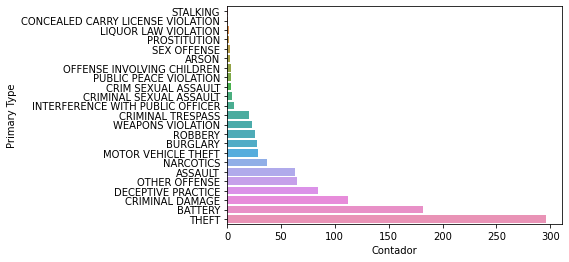

In [7]:
#problema 2
def crimen(df):
  crimenes = {}

  #1) Ver la estadistica general del data frame.

  x = pd.DataFrame(df["Primary Type"].describe())
  y = pd.DataFrame(df["Date"].describe())
  
  #2) Dejar las columnas PrimaryType, y Date.

  df = df.drop("Unnamed: 0", axis = 1)

  #3) Transformar la columna Date que es tipo string en una tipo Fecha, 
  #use el siguiente metodo de pandas pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").

  df.Date=pd.to_datetime(df.Date, format="%m/%d/%Y %I:%M:%S %p")

  #4) Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee: df.groupby(columna).Date.count()

  datos_info = df.groupby("Primary Type").Date.count().sort_values(ascending = True)
  dataframe = pd.DataFrame(datos_info) # cuando lo retorno no aparece de forma ascendente, quede como peepo, porque putas, no se, la bna

  #5) Ordenar los valores por orden alfabetico de Primary type

  df.sort_values("Primary Type")

  #6) Mostrar de la fila 100 a la 120

  filas = df.iloc[100:121] #

  #7) Realizar una visualización de los datos anteriores.Emplee la libreria 
  #    seaborn con un grafico tipo barplot. Ej. ax = sns.barplot(x = "contador", y="Primary Type", data = datos)

  datos_info=datos_info.reset_index()
  datos_info = datos_info.rename(columns={"Date":"Contador"})
  ax = sns.barplot(x = "Contador", y="Primary Type", data = datos_info)

  return print(x)  , print(y) , print(dataframe) , filas , ax

print(crimen(df))

In [8]:
import matplotlib.pyplot as plt
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vSJ7bFjFQu-VmuwebbH0vrg8a3b168p6aTsglLbMISvmgYmg9yGT6mPdlAUVeBl1lU1Cxnj9wtNxghu/pub?output=csv"
df = pd.read_csv(path)

In [9]:
tf = df.country == "Colombia"
df1 = df[tf]
df1 = df1.reset_index() # este es el csv nuevo

El numero de vacunados son: 334252.0


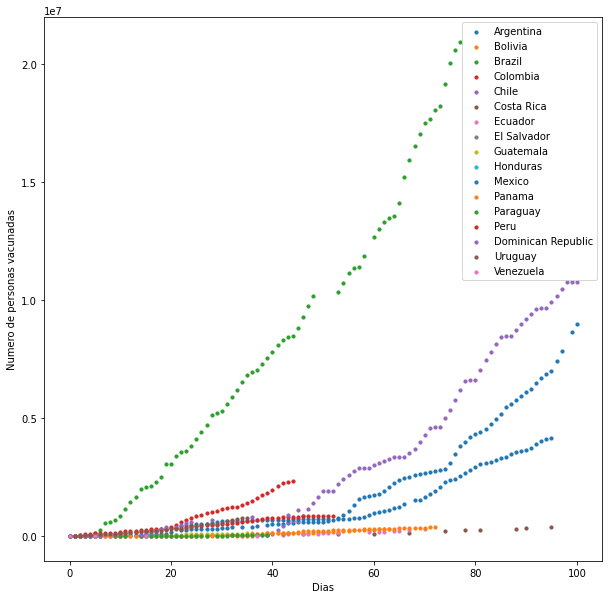

In [31]:
def latam(df):

  latam = ["Argentina","Bolivia","Brazil","Colombia","Chile","Costa Rica","Ecuador","El Salvador","Guatemala","Honduras","Mexico","Panama","Paraguay","Peru","Dominican Republic","Uruguay","Venezuela"]

  fig, ax = plt.subplots(figsize = (10,10)) 
  for pais in latam:
    tf = df[df["country"] == pais]
    tf = tf.reset_index()
    plt.scatter(list(tf.index),tf.total_vaccinations, s = 10, label = pais)
    df['country'].value_counts().tolist()
  ax.legend()
  ax.set_xlabel("Dias")
  ax.set_ylabel("Numero de personas vacunadas")

  tf1 = df1[df1.total_vaccinations.apply(lambda x: x>=1.5E6 and x<=2.0E6)]

  b = 0
  for i in tf1["daily_vaccinations"]:
    b += i

  return b

print(f"El numero de vacunados son: {latam(df)}")